<a href="https://colab.research.google.com/github/BasitHussain5/UG-Final-Thesis-Project/blob/main/Hybride_Model_for_Crop_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'maizdataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4546520%2F7771587%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241009%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241009T090418Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4256f0e5a6e3360d29b11f529ab3ff45b0926ba6d18572d73ed1de11fa06cd5b6ad683ed76ffacf57f3be4852a4a70743578fd765352e2fe5ff034593984f45e3aec3a3e18234245c4416095cab82300cc2e5df6c3d8f195acc8112fbb600f2817cecca4d086babb610cde4f36b5752ec132f0e0c6dbcdaada48ead89f5872a1e940d700aee6514c2a2d5fc433303d371ab9784548cab89df7857c4c087ee092c7439ae0b75b9ab2b18e8d8f9b1d9129d68d9bfb6f767c8f5128a1a44a75f8f50eef2db2c3cdf963d6603c83bc774370735de01d6d24f08cae77e4dd119b37f9bb61da25a6c39f657510e8c291437da74a65d43b6ab4067da7f87fd17e3cb190,data-after-au:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4594418%2F7837765%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241009%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241009T090418Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0cc81e31c7c47f676ab3ac79fcf522e81015346601927f35df1e365194f2c7dc37a72f9e6a81d25def2745907ef60d5f59f5017cfeb5b9591a3d00c709f1b1542bd7b870c2c97a7c54cdd1a0b88f9bf0907c1fd559a7412dd97f14fddf2b2307bf29f6e151895997b33dc7e9e7dc1f12e712d71b88c9eb0914db6a4da019f49f7a7027a068395f811776e7ccf94d2c5e8e8228a1a2f64fe73ada30ee1b47be1b230ab05f9b955f4ffd1187375ba053f0f2b0d1f880d7637c47f6d0cbb0d4700740ddf607000a6d25c6f4852079437527d9c13a5190351b420d33ec64a9b779df72451b6a43fc0170a1a30d81b0b8dc91c15f76ff3b6e2fc665067c3c34e6d9fb,validation-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4639144%2F7899550%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241009%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241009T090418Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3dc6805e3261c4fed4344a45c9363c79c55d11afa4580df02ce3c794804dd938345c13b456896b2e43f2b78272b17b8f1fddfc7b263ca2781c3fd22107a6614b89f5f3e82d0579816296f3366df70455f844b0eb9ab61e5bf40471d7d7ea549ca7d7062ca257b521c7f9b38d28b790a60ad9de30bdc74920bdbb4e7f0f68f85e54ae917e27457ac4b062942f43e9d77a05530821f04e5a9e07a59ac4837892ba239e17f93a59cdeff5004dac9801a3578701df4751e483f7a658f4f966fac3b8e451fa58e3f62cf63ee8885ce118dad2af6f6fb4d5972e82339d947b916966a2d24371695478cfd6b040c6eeb0cba1b400a2f438e58dac0444147ea1e50c452a,training-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4639168%2F7899583%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241009%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241009T090418Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D49a322f47e8347cb9d2cfec360c2caf757b305cd208db89e207185163fc3580bfcba7b39cb6fbbb47e436f3be876dfa2eb801e6ce5e8d831f74984331c66fafbec261e3dbfa1b9b5359fc52a029d4afa407eef5fff904eadce5ef1179f5bd26508951fc47f75e2858cd60289a514cf1affd1a39a70f0fa9d395f38a6597cc99e4bcf7e99ad45f46fd99fbc4e13031ee17c61a6329eeb29482cf5ba9ada587be71cecadca0a5c2ae33804eefc8fd8e61aa491b5486a434bc5b3dee3672dcbb6fb5d5657d2bff78754674d06d9c94e241653f23bed4da7667789612fcf64b08f7e6513f2e552cfc5b7906cdd15bae29f527cb73074c423b5da6c6e14e62245e285'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


# Load DataSet

In [ ]:
# Step 1: Import required libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import timm
import time
import numpy as np
import matplotlib.pyplot as plt
from torch import optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Path to your dataset
data_dir = '/kaggle/input/maizdataset/maizdataset'

# Step 2: Set up data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset and split into training and validation sets
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Splitting dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

# Print class names to verify
print("Classes:", dataset.classes)

# Step 4: Instantiate pre-trained MobileViT and DaViT models from timm
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Classes: ['HEATHLY', 'MLN_1_and_MLN_2', 'MSV_1', 'MSV_2']


# Building Hybride Model

- Fusion of MobileVit & Davit

In [ ]:
class EnsembleModel(nn.Module):
    def __init__(self, mobilevit, davit, num_classes):
        super(EnsembleModel, self).__init__()
        self.mobilevit = mobilevit
        self.davit = davit
        self.fc1 = nn.Linear(num_classes * 2, 512)  # First fully connected hidden layer
        self.relu = nn.ReLU()  # Activation function
        self.dropout = nn.Dropout(p=0.5)  # Dropout layer to prevent overfitting
        self.fc2 = nn.Linear(512, num_classes)  # Final output layer

    def forward(self, x):
        out_mobilevit = self.mobilevit(x)
        out_davit = self.davit(x)
        out = torch.cat((out_mobilevit, out_davit), dim=1)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out

# Load pre-trained MobileViT and fine-tune
mobilevit = timm.create_model('mobilevit_s', pretrained=True, num_classes=len(dataset.classes))
mobilevit = mobilevit.to(device)
for param in mobilevit.parameters():  # Fine-tuning: Unfreeze all layers
    param.requires_grad = True

# Load pre-trained DaViT and fine-tune
davit = timm.create_model('davit_small', pretrained=True, num_classes=len(dataset.classes))
davit = davit.to(device)
for param in davit.parameters():  # Fine-tuning: Unfreeze all layers
    param.requires_grad = True

# Create the ensemble model
ensemble_model = EnsembleModel(mobilevit, davit, num_classes=len(dataset.classes)).to(device)


model.safetensors:   0%|          | 0.00/22.4M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/199M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/timm/models/_hub.py:190: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cached_file, map_location='cpu')
/opt/conda/

In [ ]:
# Optimizer and loss function
optimizer = torch.optim.Adam(ensemble_model.parameters(), lr=0.0001, weight_decay=1e-5)  # Lower LR for fine-tuning
criterion = nn.CrossEntropyLoss()

# Learning rate scheduler for better optimization
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

In [ ]:
# # Step 5: Define loss function and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(ensemble_model.parameters(), lr=1e-5)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)


# Function to calculate GPU memory usage
def get_gpu_memory_usage():
    return torch.cuda.memory_allocated() / (1024 * 1024)  # in MB

# Training

In [ ]:
epochs = 30
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []  # Corrected initialization
gpu_memory_usage = []
time_per_epoch = []


for epoch in range(epochs):
    start_time = time.time()

    # Training phase
    ensemble_model.train()
    running_loss, running_corrects, total_samples = 0, 0, 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = ensemble_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Accumulate metrics
        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels).item()
        total_samples += labels.size(0)

    train_loss = running_loss / total_samples
    train_acc = running_corrects / total_samples
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation phase
    ensemble_model.eval()
    val_running_loss, val_running_corrects, val_total_samples = 0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = ensemble_model(inputs)
            loss = criterion(outputs, labels)

            # Accumulate metrics
            val_running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            val_running_corrects += torch.sum(preds == labels).item()
            val_total_samples += labels.size(0)

    val_loss = val_running_loss / val_total_samples
    val_acc = val_running_corrects / val_total_samples
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    # Measure GPU memory and time
    memory_gpu = get_gpu_memory_usage()
    gpu_memory_usage.append(memory_gpu)
    elapsed_time = time.time() - start_time
    time_per_epoch.append(elapsed_time)

    # Print progress for each epoch
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, GPU Memory: {memory_gpu:.2f} MB, Time: {elapsed_time:.2f}s")

Epoch 1/30, Train Loss: 0.2918, Train Acc: 0.8864, Val Loss: 0.1618, Val Acc: 0.9352, GPU Memory: 865.78 MB, Time: 636.75s
Epoch 2/30, Train Loss: 0.1622, Train Acc: 0.9382, Val Loss: 0.1756, Val Acc: 0.9306, GPU Memory: 865.78 MB, Time: 635.46s
Epoch 3/30, Train Loss: 0.1350, Train Acc: 0.9502, Val Loss: 0.1869, Val Acc: 0.9277, GPU Memory: 865.78 MB, Time: 635.70s
Epoch 4/30, Train Loss: 0.1131, Train Acc: 0.9589, Val Loss: 0.1612, Val Acc: 0.9388, GPU Memory: 865.78 MB, Time: 635.60s
Epoch 5/30, Train Loss: 0.0956, Train Acc: 0.9651, Val Loss: 0.1557, Val Acc: 0.9485, GPU Memory: 865.78 MB, Time: 635.66s
Epoch 6/30, Train Loss: 0.0639, Train Acc: 0.9779, Val Loss: 0.1818, Val Acc: 0.9365, GPU Memory: 865.78 MB, Time: 635.23s
Epoch 7/30, Train Loss: 0.0551, Train Acc: 0.9824, Val Loss: 0.1706, Val Acc: 0.9443, GPU Memory: 865.78 MB, Time: 635.15s
Epoch 8/30, Train Loss: 0.0402, Train Acc: 0.9857, Val Loss: 0.2171, Val Acc: 0.9362, GPU Memory: 865.78 MB, Time: 635.25s
Epoch 9/30, Trai

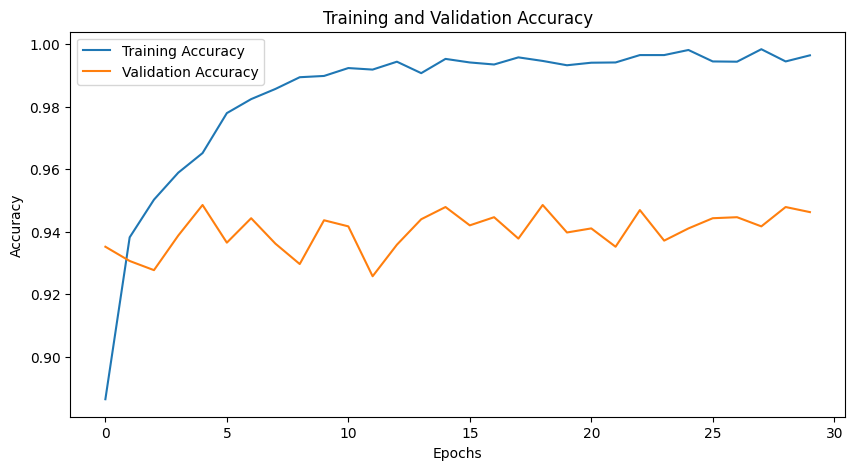

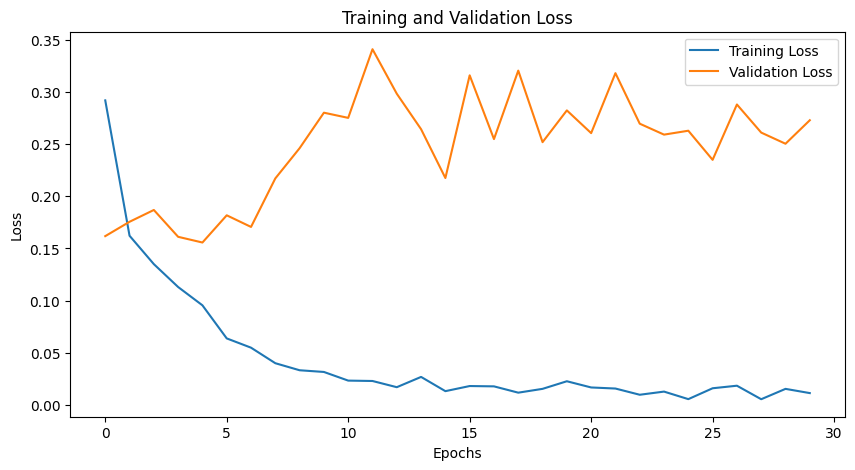

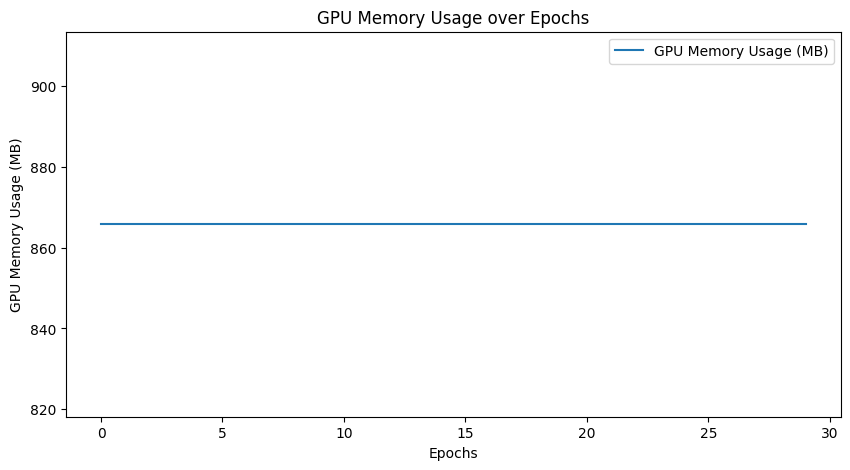

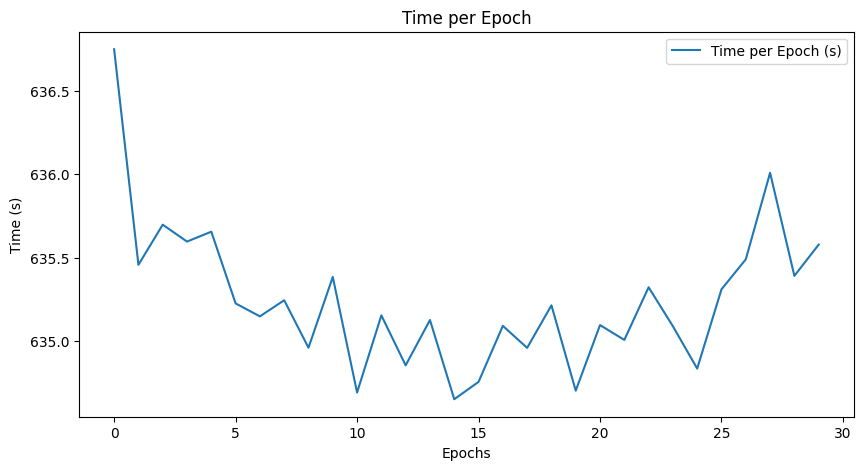

In [ ]:
# Plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot GPU Memory Usage per epoch
plt.figure(figsize=(10, 5))
plt.plot(gpu_memory_usage, label='GPU Memory Usage (MB)')
plt.xlabel('Epochs')
plt.ylabel('GPU Memory Usage (MB)')
plt.title('GPU Memory Usage over Epochs')
plt.legend()
plt.show()

# Plot time per epoch
plt.figure(figsize=(10, 5))
plt.plot(time_per_epoch, label='Time per Epoch (s)')
plt.xlabel('Epochs')
plt.ylabel('Time (s)')
plt.title('Time per Epoch')
plt.legend()
plt.show()

In [ ]:
# Classification report and confusion matrix on validation set
all_preds, all_labels = [], []
ensemble_model.eval()
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = ensemble_model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Classification report
class_report = classification_report(all_labels, all_preds, target_names=dataset.classes)
print("Classification Report:\n", class_report)

Classification Report:
                  precision    recall  f1-score   support

        HEATHLY        1.00      1.00      1.00      1066
MLN_1_and_MLN_2        0.98      1.00      0.99       768
          MSV_1        0.90      0.89      0.89       647
          MSV_2        0.89      0.89      0.90       589

     accuracy                              0.96      3070
      macro avg        0.94      0.95      0.95      3070
   weighted avg        0.95      0.96      0.96      3070


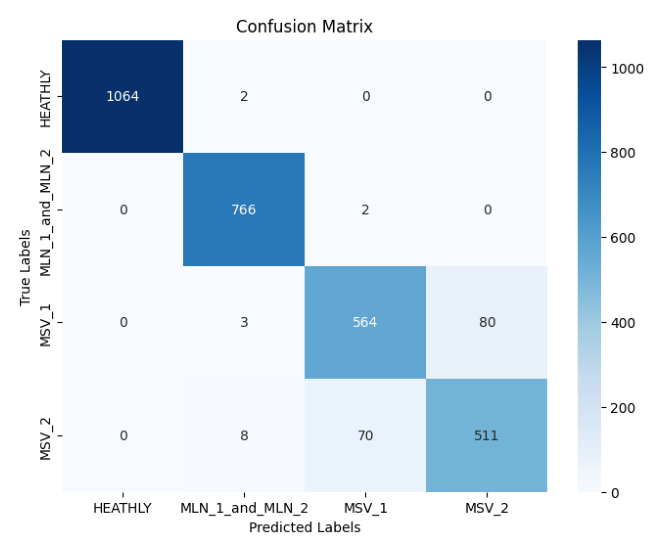

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# XAI

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = timm.create_model('mobilevit_s', pretrained=True, num_classes=len(dataset.classes))
model = model.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Function to calculate GPU memory usage
def get_gpu_memory_usage():
    return torch.cuda.memory_allocated() / (1024 * 1024)  # in MB

In [ ]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Training setup variables
num_epochs = 10
train_accuracies, val_accuracies = [], []
train_losses, val_losses = [], []  # Corrected initialization
gpu_memory_usage = []
time_per_epoch = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    start_time = time.time()

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100. * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation phase
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_loss = val_loss / len(val_loader)
    val_acc = 100. * correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    end_time = time.time()
    time_per_epoch.append(end_time - start_time)

    # Track GPU memory usage
    gpu_memory_usage.append(torch.cuda.memory_allocated() / (1024 * 1024))
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%, Time: {end_time - start_time:.2f}s')


Epoch 1/10, Train Loss: 0.0712, Train Acc: 97.37%, Val Loss: 0.1712, Val Acc: 94.53%, Time: 77.69s
Epoch 2/10, Train Loss: 0.0555, Train Acc: 98.09%, Val Loss: 0.1998, Val Acc: 92.93%, Time: 78.24s
Epoch 3/10, Train Loss: 0.0401, Train Acc: 98.71%, Val Loss: 0.2778, Val Acc: 91.43%, Time: 77.71s
Epoch 4/10, Train Loss: 0.0345, Train Acc: 98.90%, Val Loss: 0.2216, Val Acc: 93.68%, Time: 77.78s
Epoch 5/10, Train Loss: 0.0292, Train Acc: 99.10%, Val Loss: 0.2594, Val Acc: 93.65%, Time: 78.40s
Epoch 6/10, Train Loss: 0.0250, Train Acc: 99.23%, Val Loss: 0.2869, Val Acc: 94.27%, Time: 77.97s
Epoch 7/10, Train Loss: 0.0225, Train Acc: 99.32%, Val Loss: 0.2370, Val Acc: 93.91%, Time: 78.28s
Epoch 8/10, Train Loss: 0.0182, Train Acc: 99.34%, Val Loss: 0.2840, Val Acc: 93.97%, Time: 77.62s
Epoch 9/10, Train Loss: 0.0183, Train Acc: 99.39%, Val Loss: 0.4843, Val Acc: 91.11%, Time: 77.62s
Epoch 10/10, Train Loss: 0.0203, Train Acc: 99.31%, Val Loss: 0.2686, Val Acc: 93.97%, Time: 78.12s


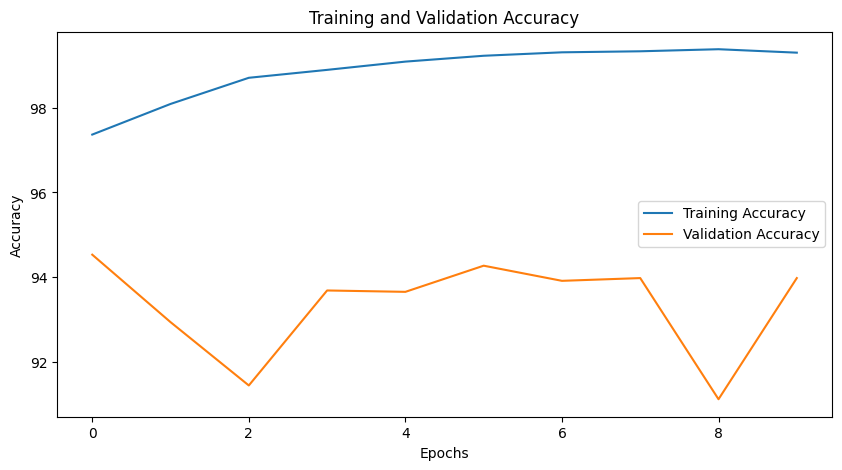

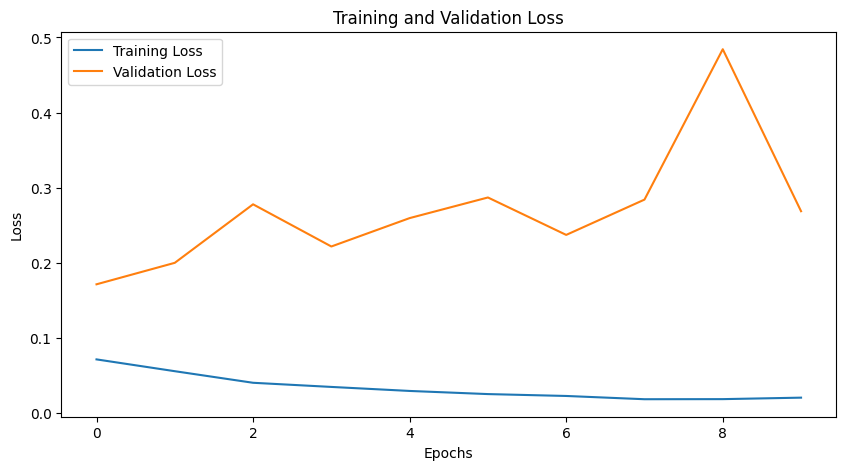

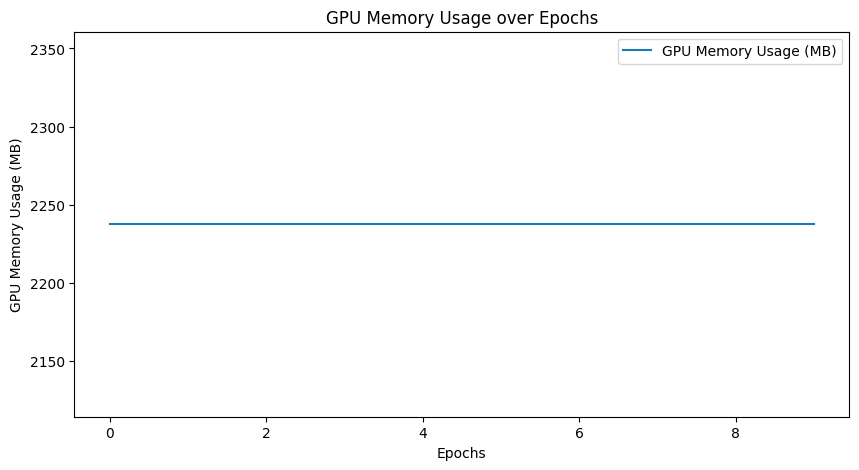

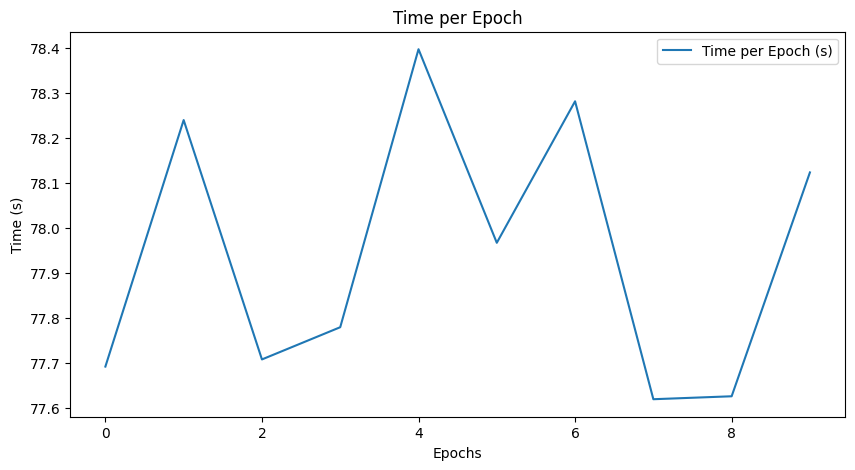

In [ ]:
# Plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot GPU Memory Usage per epoch
plt.figure(figsize=(10, 5))
plt.plot(gpu_memory_usage, label='GPU Memory Usage (MB)')
plt.xlabel('Epochs')
plt.ylabel('GPU Memory Usage (MB)')
plt.title('GPU Memory Usage over Epochs')
plt.legend()
plt.show()

# Plot time per epoch
plt.figure(figsize=(10, 5))
plt.plot(time_per_epoch, label='Time per Epoch (s)')
plt.xlabel('Epochs')
plt.ylabel('Time (s)')
plt.title('Time per Epoch')
plt.legend()
plt.show()


In [ ]:
# Classification report and confusion matrix on validation set
all_preds, all_labels = [], []
model.eval()
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Classification report
class_report = classification_report(all_labels, all_preds, target_names=dataset.classes)
print("Classification Report:\n", class_report)


Classification Report:
                  precision    recall  f1-score   support

        HEATHLY       1.00      1.00      1.00      1048
MLN_1_and_MLN_2       0.99      0.99      0.99       771
          MSV_1       0.82      0.92      0.87       620
          MSV_2       0.92      0.80      0.86       631

       accuracy                           0.94      3070
      macro avg       0.93      0.93      0.93      3070
   weighted avg       0.94      0.94      0.94      3070



# XAI Impilimentation

# Saliency Maps

# Healthy


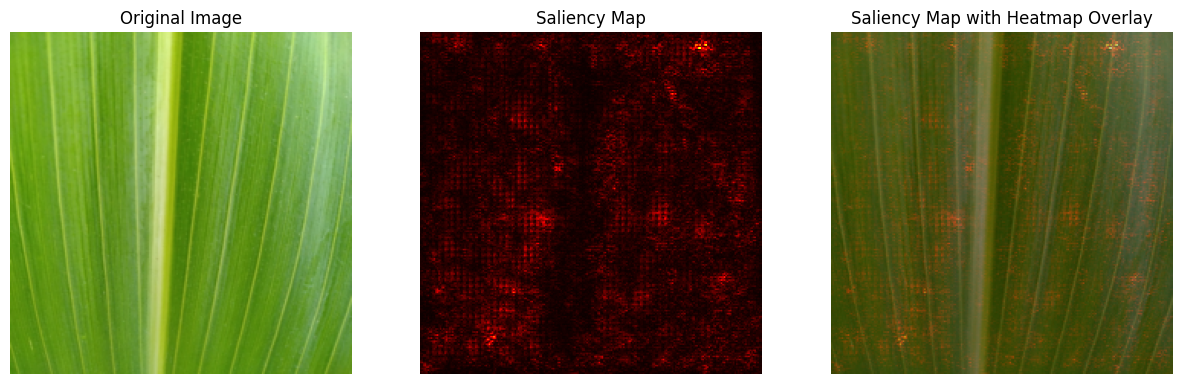

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
from PIL import Image

# Function to preprocess the image
def preprocess_image(image_path, transform):
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image)
    return image_tensor

# Function to generate saliency map and return necessary components
def generate_saliency_map(model, image_tensor, label_idx):
    model.eval()
    image_tensor.requires_grad_()
    output = model(image_tensor.unsqueeze(0))
    loss = output[0, label_idx]
    model.zero_grad()
    loss.backward()
    saliency = image_tensor.grad.data.abs().max(dim=0)[0]

    return saliency

# Function to show all images in one row
def show_all_images(original_image, saliency, saliency_with_overlay):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # Create a 1x3 subplot

    # Original Image
    ax[0].imshow(original_image)
    ax[0].axis('off')
    ax[0].set_title('Original Image')

    # Saliency Map
    ax[1].imshow(saliency, cmap='hot')
    ax[1].axis('off')
    ax[1].set_title('Saliency Map')

    # Saliency Map with Heatmap Overlay
    ax[2].imshow(saliency_with_overlay)
    ax[2].axis('off')
    ax[2].set_title('Saliency Map with Heatmap Overlay')

    plt.show()

# Function to show saliency map with heatmap overlay and circles
def show_saliency_map_with_circles(image, saliency, title='Saliency Map with Heatmap Overlay'):
    image = image.detach().permute(1, 2, 0).cpu().numpy()
    image = (image - np.min(image)) / (np.max(image) - np.min(image))
    saliency = saliency.squeeze().cpu().numpy()
    saliency = np.maximum(saliency, 0)
    saliency = saliency / saliency.max()

    # Create a heatmap overlay
    heatmap = plt.cm.hot(saliency)[:, :, :3]  # Convert to RGB
    overlay = (0.5 * image + 0.5 * heatmap)  # Blend original image with heatmap

    # Find coordinates for top k saliency points
    k = 15
    threshold = np.sort(saliency.flatten())[-k]
    coords = np.column_stack(np.where(saliency >= threshold))

    # Create a new figure for overlay
    plt.figure()
    plt.imshow(overlay)

    # Overlay circles in red
    for y, x in coords:
        circle = plt.Circle((x, y), radius=10, color='red', fill=False, linewidth=2)  # Change color to red
        plt.gca().add_artist(circle)

    plt.axis('off')
    plt.title(title)
    plt.show()

    return overlay

# Path to the image
image_path = '/kaggle/input/maizdataset/maizdataset/HEATHLY/Image_1.jpg'
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize as per model input
    transforms.ToTensor(),
])
image_tensor = preprocess_image(image_path, transform)
image_tensor = image_tensor.to(device)

#
label_idx = 0  # Example: Class index (change as needed)
saliency = generate_saliency_map(model, image_tensor, label_idx)
original_image = image_tensor.detach().cpu().permute(1, 2, 0).numpy()  # Use detach() here
show_all_images(original_image, saliency.detach().cpu().numpy(), saliency_with_overlay)

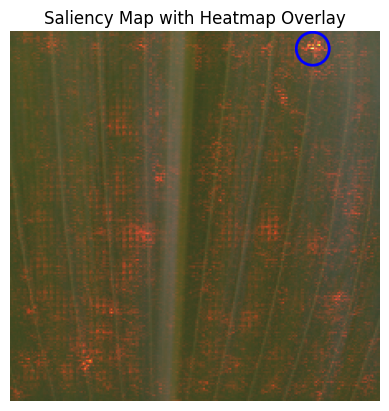

In [ ]:
def show_saliency_map_with_circles(image, saliency, title='Saliency Map with Heatmap Overlay'):
    image = image.detach().permute(1, 2, 0).cpu().numpy()
    image = (image - np.min(image)) / (np.max(image) - np.min(image))
    saliency = saliency.squeeze().cpu().numpy()
    saliency = np.maximum(saliency, 0)
    saliency = saliency / saliency.max()
    k = 1
    threshold = np.sort(saliency.flatten())[-k]
    coords = np.column_stack(np.where(saliency >= threshold))
    fig, ax = plt.subplots(1, 1)
    ax.imshow(image, alpha=0.7)
    ax.imshow(saliency, cmap='hot', alpha=0.6)
    for y, x in coords:
        circle = plt.Circle((x, y), radius=10, color='blue', fill=False, linewidth=2)
        ax.add_artist(circle)
    ax.axis('off')
    ax.set_title(title)
    plt.show()
def generate_saliency_map(model, image_tensor, label_idx):
    model.eval()
    image_tensor.requires_grad_()
    output = model(image_tensor.unsqueeze(0))
    loss = output[0, label_idx]
    model.zero_grad()
    loss.backward()
    saliency = image_tensor.grad.data.abs().max(dim=0)[0]
    show_saliency_map_with_circles(image_tensor.cpu(), saliency)
def preprocess_image(image_path, transform):
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image)
    return image_tensor

image_path = '/kaggle/input/maizdataset/maizdataset/HEATHLY/Image_1.jpg'
image_tensor = preprocess_image(image_path, transform)
image_tensor = image_tensor.to(device)
label_idx = 0
generate_saliency_map(model, image_tensor, label_idx)

# MLN

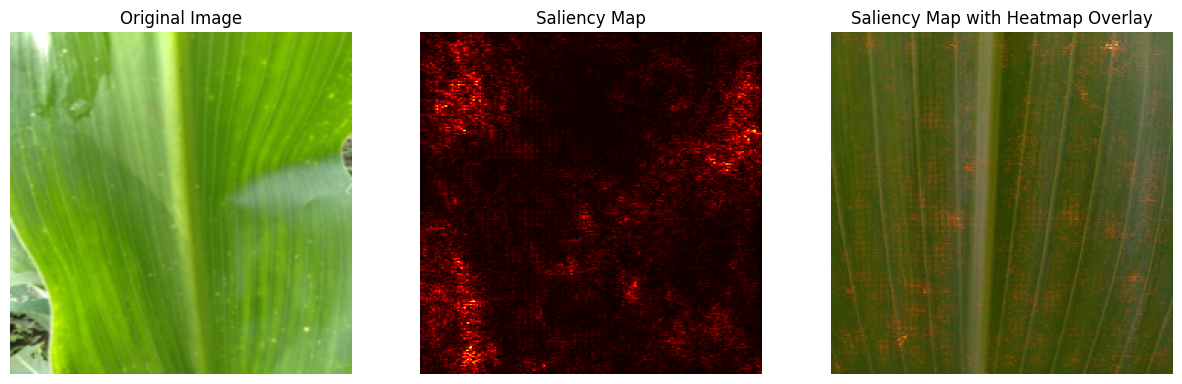

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
from PIL import Image

# Function to preprocess the image
def preprocess_image(image_path, transform):
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image)
    return image_tensor

# Function to generate saliency map and return necessary components
def generate_saliency_map(model, image_tensor, label_idx):
    model.eval()
    image_tensor.requires_grad_()
    output = model(image_tensor.unsqueeze(0))
    loss = output[0, label_idx]
    model.zero_grad()
    loss.backward()
    saliency = image_tensor.grad.data.abs().max(dim=0)[0]

    return saliency

# Function to show all images in one row
def show_all_images(original_image, saliency, saliency_with_overlay):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # Create a 1x3 subplot

    # Original Image
    ax[0].imshow(original_image)
    ax[0].axis('off')
    ax[0].set_title('Original Image')

    # Saliency Map
    ax[1].imshow(saliency, cmap='hot')
    ax[1].axis('off')
    ax[1].set_title('Saliency Map')

    # Saliency Map with Heatmap Overlay
    ax[2].imshow(saliency_with_overlay)
    ax[2].axis('off')
    ax[2].set_title('Saliency Map with Heatmap Overlay')

    plt.show()

# Function to show saliency map with heatmap overlay and circles
def show_saliency_map_with_circles(image, saliency, title='Saliency Map with Heatmap Overlay'):
    image = image.detach().permute(1, 2, 0).cpu().numpy()
    image = (image - np.min(image)) / (np.max(image) - np.min(image))
    saliency = saliency.squeeze().cpu().numpy()
    saliency = np.maximum(saliency, 0)
    saliency = saliency / saliency.max()

    # Create a heatmap overlay
    heatmap = plt.cm.hot(saliency)[:, :, :3]  # Convert to RGB
    overlay = (0.5 * image + 0.5 * heatmap)  # Blend original image with heatmap

    # Find coordinates for top k saliency points
    k = 15
    threshold = np.sort(saliency.flatten())[-k]
    coords = np.column_stack(np.where(saliency >= threshold))

    # Create a new figure for overlay
    plt.figure()
    plt.imshow(overlay)

    # Overlay circles in red
    for y, x in coords:
        circle = plt.Circle((x, y), radius=10, color='red', fill=False, linewidth=2)  # Change color to red
        plt.gca().add_artist(circle)

    plt.axis('off')
    plt.title(title)
    plt.show()

    return overlay

# Path to the image
image_path = '/kaggle/input/maizdataset/maizdataset/MLN_1_and_MLN_2/Image_1001.jpg'
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize as per model input
    transforms.ToTensor(),
])
image_tensor = preprocess_image(image_path, transform)
image_tensor = image_tensor.to(device)

#
label_idx = 0  # Example: Class index (change as needed)
saliency = generate_saliency_map(model, image_tensor, label_idx)
original_image = image_tensor.detach().cpu().permute(1, 2, 0).numpy()  # Use detach() here
show_all_images(original_image, saliency.detach().cpu().numpy(), saliency_with_overlay)

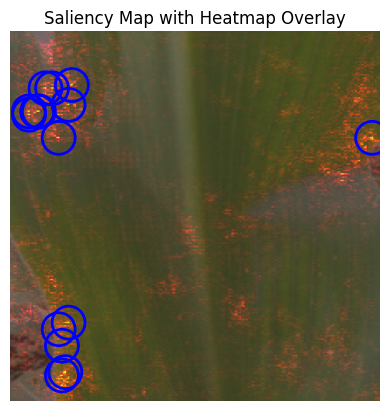

In [ ]:
def show_saliency_map_with_circles(image, saliency, title='Saliency Map with Heatmap Overlay'):
    image = image.detach().permute(1, 2, 0).cpu().numpy()
    image = (image - np.min(image)) / (np.max(image) - np.min(image))
    saliency = saliency.squeeze().cpu().numpy()
    saliency = np.maximum(saliency, 0)
    saliency = saliency / saliency.max()
    k = 15
    threshold = np.sort(saliency.flatten())[-k]
    coords = np.column_stack(np.where(saliency >= threshold))
    fig, ax = plt.subplots(1, 1)
    ax.imshow(image, alpha=0.7)
    ax.imshow(saliency, cmap='hot', alpha=0.6)
    for y, x in coords:
        circle = plt.Circle((x, y), radius=10, color='blue', fill=False, linewidth=2)
        ax.add_artist(circle)
    ax.axis('off')
    ax.set_title(title)
    plt.show()
def generate_saliency_map(model, image_tensor, label_idx):
    model.eval()
    image_tensor.requires_grad_()
    output = model(image_tensor.unsqueeze(0))
    loss = output[0, label_idx]
    model.zero_grad()
    loss.backward()
    saliency = image_tensor.grad.data.abs().max(dim=0)[0]
    show_saliency_map_with_circles(image_tensor.cpu(), saliency)
def preprocess_image(image_path, transform):
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image)
    return image_tensor

image_path = '/kaggle/input/maizdataset/maizdataset/MLN_1_and_MLN_2/Image_1001.jpg'
image_tensor = preprocess_image(image_path, transform)
image_tensor = image_tensor.to(device)
label_idx = 1
generate_saliency_map(model, image_tensor, label_idx)

# MSV1

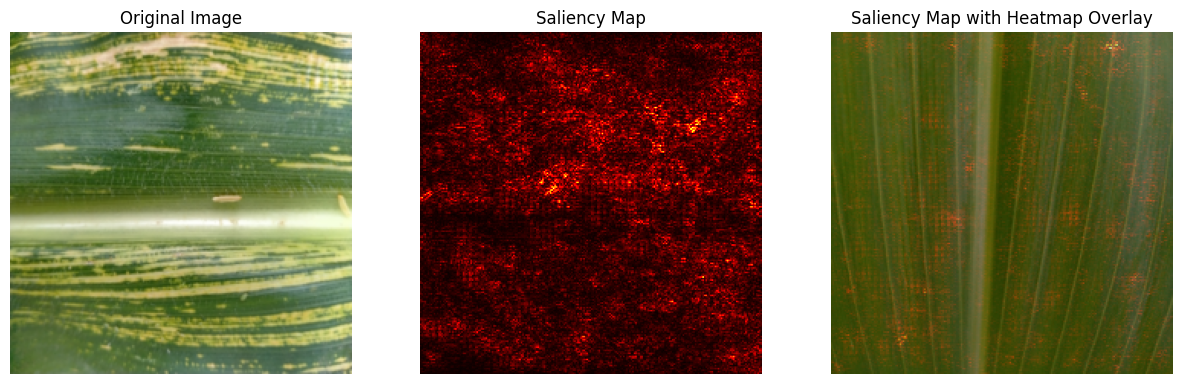

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
from PIL import Image

# Function to preprocess the image
def preprocess_image(image_path, transform):
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image)
    return image_tensor

# Function to generate saliency map and return necessary components
def generate_saliency_map(model, image_tensor, label_idx):
    model.eval()
    image_tensor.requires_grad_()
    output = model(image_tensor.unsqueeze(0))
    loss = output[0, label_idx]
    model.zero_grad()
    loss.backward()
    saliency = image_tensor.grad.data.abs().max(dim=0)[0]

    return saliency

# Function to show all images in one row
def show_all_images(original_image, saliency, saliency_with_overlay):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # Create a 1x3 subplot

    # Original Image
    ax[0].imshow(original_image)
    ax[0].axis('off')
    ax[0].set_title('Original Image')

    # Saliency Map
    ax[1].imshow(saliency, cmap='hot')
    ax[1].axis('off')
    ax[1].set_title('Saliency Map')

    # Saliency Map with Heatmap Overlay
    ax[2].imshow(saliency_with_overlay)
    ax[2].axis('off')
    ax[2].set_title('Saliency Map with Heatmap Overlay')

    plt.show()

# Function to show saliency map with heatmap overlay and circles
def show_saliency_map_with_circles(image, saliency, title='Saliency Map with Heatmap Overlay'):
    image = image.detach().permute(1, 2, 0).cpu().numpy()
    image = (image - np.min(image)) / (np.max(image) - np.min(image))
    saliency = saliency.squeeze().cpu().numpy()
    saliency = np.maximum(saliency, 0)
    saliency = saliency / saliency.max()

    # Create a heatmap overlay
    heatmap = plt.cm.hot(saliency)[:, :, :3]  # Convert to RGB
    overlay = (0.5 * image + 0.5 * heatmap)  # Blend original image with heatmap

    # Find coordinates for top k saliency points
    k = 15
    threshold = np.sort(saliency.flatten())[-k]
    coords = np.column_stack(np.where(saliency >= threshold))

    # Create a new figure for overlay
    plt.figure()
    plt.imshow(overlay)

    # Overlay circles in red
    for y, x in coords:
        circle = plt.Circle((x, y), radius=10, color='red', fill=False, linewidth=2)  # Change color to red
        plt.gca().add_artist(circle)

    plt.axis('off')
    plt.title(title)
    plt.show()

    return overlay

# Path to the image
image_path = '/kaggle/input/maizdataset/maizdataset/MSV_1/Image_1004.jpg'
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize as per model input
    transforms.ToTensor(),
])
image_tensor = preprocess_image(image_path, transform)
image_tensor = image_tensor.to(device)

#
label_idx = 0  # Example: Class index (change as needed)
saliency = generate_saliency_map(model, image_tensor, label_idx)
original_image = image_tensor.detach().cpu().permute(1, 2, 0).numpy()  # Use detach() here
show_all_images(original_image, saliency.detach().cpu().numpy(), saliency_with_overlay)

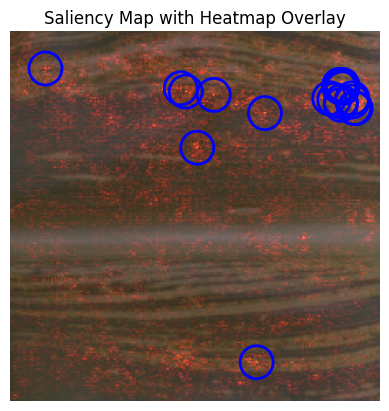

In [ ]:
def show_saliency_map_with_circles(image, saliency, title='Saliency Map with Heatmap Overlay'):
    image = image.detach().permute(1, 2, 0).cpu().numpy()
    image = (image - np.min(image)) / (np.max(image) - np.min(image))
    saliency = saliency.squeeze().cpu().numpy()
    saliency = np.maximum(saliency, 0)
    saliency = saliency / saliency.max()
    k = 20
    threshold = np.sort(saliency.flatten())[-k]
    coords = np.column_stack(np.where(saliency >= threshold))
    fig, ax = plt.subplots(1, 1)
    ax.imshow(image, alpha=0.7)
    ax.imshow(saliency, cmap='hot', alpha=0.6)
    for y, x in coords:
        circle = plt.Circle((x, y), radius=10, color='blue', fill=False, linewidth=2)
        ax.add_artist(circle)
    ax.axis('off')
    ax.set_title(title)
    plt.show()
def generate_saliency_map(model, image_tensor, label_idx):
    model.eval()
    image_tensor.requires_grad_()
    output = model(image_tensor.unsqueeze(0))
    loss = output[0, label_idx]
    model.zero_grad()
    loss.backward()
    saliency = image_tensor.grad.data.abs().max(dim=0)[0]
    show_saliency_map_with_circles(image_tensor.cpu(), saliency)
def preprocess_image(image_path, transform):
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image)
    return image_tensor

image_path = '/kaggle/input/maizdataset/maizdataset/MSV_1/Image_1004.jpg'
image_tensor = preprocess_image(image_path, transform)
image_tensor = image_tensor.to(device)
label_idx = 2
generate_saliency_map(model, image_tensor, label_idx)

# MSV2

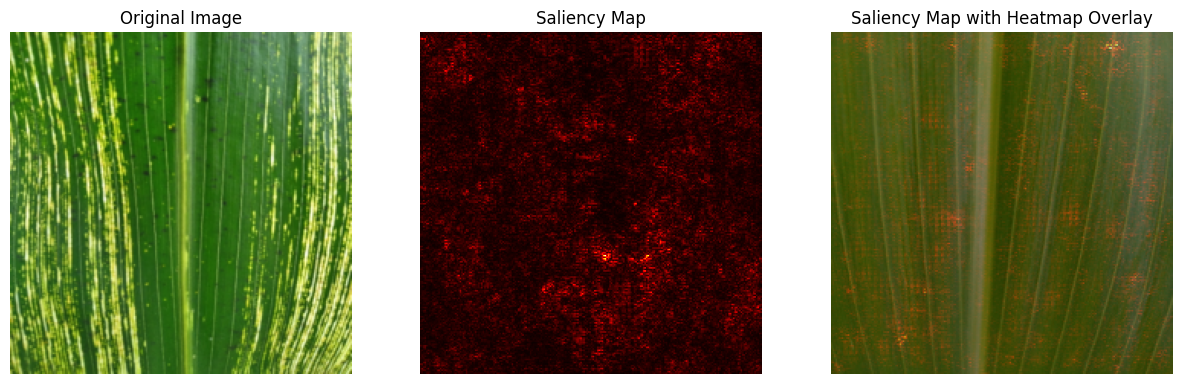

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
from PIL import Image

# Function to preprocess the image
def preprocess_image(image_path, transform):
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image)
    return image_tensor

# Function to generate saliency map and return necessary components
def generate_saliency_map(model, image_tensor, label_idx):
    model.eval()
    image_tensor.requires_grad_()
    output = model(image_tensor.unsqueeze(0))
    loss = output[0, label_idx]
    model.zero_grad()
    loss.backward()
    saliency = image_tensor.grad.data.abs().max(dim=0)[0]

    return saliency

# Function to show all images in one row
def show_all_images(original_image, saliency, saliency_with_overlay):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # Create a 1x3 subplot

    # Original Image
    ax[0].imshow(original_image)
    ax[0].axis('off')
    ax[0].set_title('Original Image')

    # Saliency Map
    ax[1].imshow(saliency, cmap='hot')
    ax[1].axis('off')
    ax[1].set_title('Saliency Map')

    # Saliency Map with Heatmap Overlay
    ax[2].imshow(saliency_with_overlay)
    ax[2].axis('off')
    ax[2].set_title('Saliency Map with Heatmap Overlay')

    plt.show()

# Function to show saliency map with heatmap overlay and circles
def show_saliency_map_with_circles(image, saliency, title='Saliency Map with Heatmap Overlay'):
    image = image.detach().permute(1, 2, 0).cpu().numpy()
    image = (image - np.min(image)) / (np.max(image) - np.min(image))
    saliency = saliency.squeeze().cpu().numpy()
    saliency = np.maximum(saliency, 0)
    saliency = saliency / saliency.max()

    # Create a heatmap overlay
    heatmap = plt.cm.hot(saliency)[:, :, :3]  # Convert to RGB
    overlay = (0.5 * image + 0.5 * heatmap)  # Blend original image with heatmap

    # Find coordinates for top k saliency points
    k = 15
    threshold = np.sort(saliency.flatten())[-k]
    coords = np.column_stack(np.where(saliency >= threshold))

    # Create a new figure for overlay
    plt.figure()
    plt.imshow(overlay)

    # Overlay circles in red
    for y, x in coords:
        circle = plt.Circle((x, y), radius=10, color='red', fill=False, linewidth=2)  # Change color to red
        plt.gca().add_artist(circle)

    plt.axis('off')
    plt.title(title)
    plt.show()

    return overlay

# Path to the image
image_path = '/kaggle/input/maizdataset/maizdataset/MSV_2/Image_3186.jpg'
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize as per model input
    transforms.ToTensor(),
])
image_tensor = preprocess_image(image_path, transform)
image_tensor = image_tensor.to(device)

#
label_idx = 3  # Example: Class index (change as needed)
saliency = generate_saliency_map(model, image_tensor, label_idx)
original_image = image_tensor.detach().cpu().permute(1, 2, 0).numpy()  # Use detach() here
show_all_images(original_image, saliency.detach().cpu().numpy(), saliency_with_overlay)

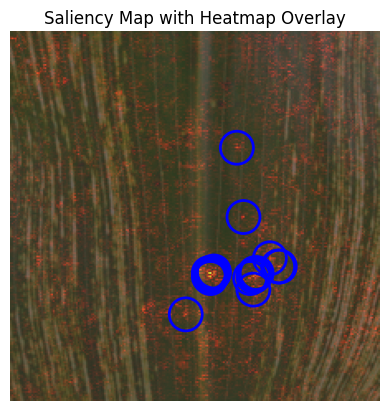

In [ ]:
def show_saliency_map_with_circles(image, saliency, title='Saliency Map with Heatmap Overlay'):
    image = image.detach().permute(1, 2, 0).cpu().numpy()
    image = (image - np.min(image)) / (np.max(image) - np.min(image))
    saliency = saliency.squeeze().cpu().numpy()
    saliency = np.maximum(saliency, 0)
    saliency = saliency / saliency.max()
    k = 20
    threshold = np.sort(saliency.flatten())[-k]
    coords = np.column_stack(np.where(saliency >= threshold))
    fig, ax = plt.subplots(1, 1)
    ax.imshow(image, alpha=0.7)
    ax.imshow(saliency, cmap='hot', alpha=0.6)
    for y, x in coords:
        circle = plt.Circle((x, y), radius=10, color='blue', fill=False, linewidth=2)
        ax.add_artist(circle)
    ax.axis('off')
    ax.set_title(title)
    plt.show()
def generate_saliency_map(model, image_tensor, label_idx):
    model.eval()
    image_tensor.requires_grad_()
    output = model(image_tensor.unsqueeze(0))
    loss = output[0, label_idx]
    model.zero_grad()
    loss.backward()
    saliency = image_tensor.grad.data.abs().max(dim=0)[0]
    show_saliency_map_with_circles(image_tensor.cpu(), saliency)
def preprocess_image(image_path, transform):
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image)
    return image_tensor

image_path = '/kaggle/input/maizdataset/maizdataset/MSV_2/Image_3186.jpg'
image_tensor = preprocess_image(image_path, transform)
image_tensor = image_tensor.to(device)
label_idx = 3
generate_saliency_map(model, image_tensor, label_idx)

# LIME

In [ ]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


# SHAP

[autoreload of numpy._core failed: Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/opt/conda/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/opt/conda/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/opt/conda/lib/python3.10/site-packages/numpy/_core/__init__.py", line 23, in <module>
    from . import multiarray
  File "/opt/conda/lib/python3.10/site-packages/numpy/_core/multiarray.py", line 84, in <module>
    def empty_like(
  File "/opt/conda/lib/python3.10/site-packages/numpy/_core/overrides.py", line 1

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
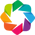

AttributeError: module 'numpy.polynomial' has no attribute 'polynomial'

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
import json

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend
from sklearn.metrics import confusion_matrix, classification_report

import shap
from operator import itemgetter

In [ ]:
train_path = my_data_dir + 'train/'
test_path = my_data_dir + 'test/'

In [ ]:
import matplotlib.pyplot as plt

# Load the image
image_path = '/kaggle/input/maizdataset/maizdataset/HEATHLY/Image_1.jpg'
image = plt.imread(image_path)

# Create a figure
plt.figure(figsize=(10, 5))

# Display the first image
plt.subplot(1, 2, 1)  # One row, two columns, first subplot
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Image 1", weight='bold', size=20)

# Display the second image (can be the same image or a different one)
plt.subplot(1, 2, 2)  # One row, two columns, second subplot
plt.imshow(image, cmap='gray')  # Use a different image if available
plt.axis('off')
plt.title("Image 2", weight='bold', size=20)

# Show the plot
plt.tight_layout()
plt.show()


TypeError: float() argument must be a string or a real number, not '_NoValueType'

<Figure size 1000x500 with 0 Axes>